<a href="https://colab.research.google.com/github/malakmlk/ML/blob/main/Iris_Classification_SAIEM_BENSADI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### **TP réalisé par** : SAIEM Malak   **&&**   BENSADI Cérine
### **Groupe:** SIQ2


---



# **Le probleme de classification des fleures d'Iris:**


> Nous traiteons dans ce notebook le probleme de classification des fleurs d'Iris, Comme dataset nous utiliserons le jeu de données [IRIS](https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv). Ce dernier est une base de données regroupant les caractéristiques de trois espèces de fleurs d’Iris, à savoir Setosa, Versicolour et Virginica. Chaque ligne de ce jeu de données est une observation des caractéristiques d’une fleur d’Iris. Ce dataset décrit les espèces d’Iris par quatre propriétés : longueur et largeur de sépales ainsi que longueur et largeur de pétales. La base de données comporte 120 observations .

> Nous avons implémenté 2 méthodes pour la classification des plantes d'iris avec tenserflow. La première avec **un réseau de neurones**, et la deuxiéme consiste à appliquer **une regression logistique multinomiale**.
Les deux modeles sont entrainnés et testés en utilisant des jeu de données commun afin de pouvoir comparer leurs précisions.

Le travail fait est présenré comme suit:


1.   Visualisation du jeu de données.
2.   Classification des fleurs f'Iris avec un réseau de neurone
3.   Classification des feurs d'iris avec une regression logistique multinomiale













# **Visualisation du jeu de données**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Dans ce qui suit , nous procédons à visualiser et afficher les caractéristiques du jeu de données


In [ ]:
iris = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
for col in iris.columns:
    print(col)

120
4
setosa
versicolor
virginica


La première ligne du jeu de données contient sa description.
Nous avons dans cette base de données : 
- 120 enregistrements
- Chaque enregistrement contient 4 attributs
- 3 valeurs possible pour les étiquettes : 
  - (0) setosa
  - (1) versicolor
  - (2) virginica
  


In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
feature_names = column_names[:-1]
label_name = column_names[-1]
iris.columns = column_names
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


À partir de cette vue de l'ensemble de données, on peut conclure que:

- La figure ci-dessus représente les premiers 5 enregistrements.
Les quatre premiers champs sont des **features** : ce sont les caractéristiques d'un exemple. Ici, les champs contiennent des nombres flottants représentant les mesures des fleurs.
La dernière colonne est le **label** : c'est la valeur que nous voulons prédire. Pour cet ensemble de données, il s'agit d'une valeur entière de 0, 1 ou 2 qui correspond à un nom de fleur.


Afficherons maintenant le nombre de fleurs qu'on a dans chacun des éspèces: 


In [ ]:
iris["species"].value_counts()

2    42
0    42
1    36
Name: species, dtype: int64

En fin, la figure ci-dessous sert à visualier l'ensemble des données en utilisant à chaque fois , un couple de variables comme axes du plan. 


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


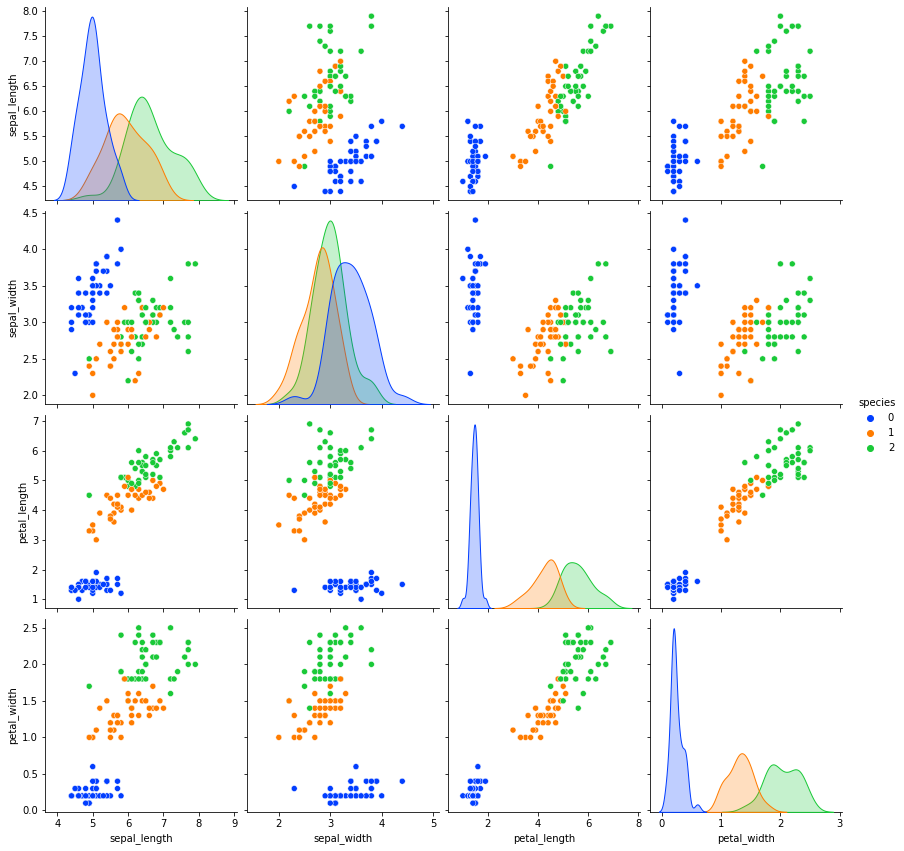

In [ ]:
sns.pairplot(iris, hue="species", palette="bright", size=3)

#**Classification des fleurs d'Iris avec un réseau de neurones**


## **Chargement des bibliothèques**



In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf


## **Chargement du jeu de données IRIS**
Dans cette partie, on va télecharger le dataset file et le convertir en une structure qu'on peut utiliser avec tenserflow.
Pour réaliser cela on utiliser la methode **tf.keras.utils.get_file**.
Dans ce qui suit, nous allons importer le fichier de donnnées, les visualiser et puis les mélanger.


In [ ]:
train_dataset_url="https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("\nUne version local du jeu de données locale est créée: {}".format(train_dataset_fp))


Une version local du jeu de données locale est créée: /root/.keras/datasets/iris_training.csv


## **Création d'un tf.data.dataset**

 Afin de pouvoir faire l'analyse de ces données dans une format approprié nous allons travailler avec la fonction **tf.data.experimental.make_csv_dataset** qui retourne  un tf.data.Dataset de tf.data.Dataset (features, label) , où features est un dictionnaire: {'feature_name': value}.

In [ ]:
batch_size = 120

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [ ]:
features, labels = next(iter(train_dataset))

RuntimeError: ignored

la fonction pack_features_vector va rendre le dictionaire des features en un seule liste de shape(120,4).

In [ ]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [ ]:
train_dataset = train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))
print(labels[:10])

tf.Tensor([2 0 0 1 0 2 1 2 0 0], shape=(10,), dtype=int32)


## **Le choix du modèle**
le modele va comporter **3 couche**,deux couches avec 10 noeud et une couche de sortie avec trois noeud, et comme fonction d'activation on a choisi de travailler avec la donction **RELU**


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)), 
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

## **Entrainement du modèle**

### Définition de loss et gradiant 

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
def loss(model, x, y, training):
 
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.3901270627975464


In [ ]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

### Création d'un optimiseur



In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


In [ ]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.3901270627975464
Step: 1,         Loss: 1.302258014678955


### Boucle d'entraînement

In [ ]:

train_loss_results = []
train_accuracy_results = []

num_epochs = 100

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  
  for x, y in train_dataset:
    # Optimizer le modele
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # ajouter le loss courant
    # comparaison entre le label prédictée et le label réel
  
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.302, Accuracy: 35.000%
Epoch 050: Loss: 0.725, Accuracy: 78.333%
Epoch 100: Loss: 0.541, Accuracy: 88.333%
Epoch 150: Loss: 0.436, Accuracy: 91.667%
Epoch 200: Loss: 0.372, Accuracy: 93.333%
Epoch 250: Loss: 0.326, Accuracy: 95.000%
Epoch 300: Loss: 0.290, Accuracy: 95.833%
Epoch 350: Loss: 0.260, Accuracy: 95.833%
Epoch 400: Loss: 0.235, Accuracy: 96.667%
Epoch 450: Loss: 0.213, Accuracy: 96.667%
Epoch 500: Loss: 0.194, Accuracy: 97.500%
Epoch 550: Loss: 0.179, Accuracy: 97.500%
Epoch 600: Loss: 0.165, Accuracy: 97.500%


## **Tester le modèle**

Pour évaluer l'efficacité d'un modèle, les exemples utilisés sont différents que des exemples utilisés pour entraîner le modèle.

La configuration de l'ensemble de Dataset test est similaire à la configuration de l'ensemble de Dataset entraînement. Téléchargez le fichier texte CSV et analysez ces valeurs, puis mélangez-le un peu:

In [ ]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [ ]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


Visualiser les valeur prédictées par rapport aux valeurs originals.

In [ ]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

on peut conclure que la majorité des valeurs prédictées sont correcte.

## **Utilisation de modele**
Apres avoir tester le modele , on peut dire qu'il bon, c'est le temps de l'utiliser pour predicter des nouvelles prédictions sur d'autres examples.

In [ ]:
predict_dataset = tf.convert_to_tensor([
    [4.8,3,1.4,0.3,],#setosa
    [7,3.2,4.7,1.4],#versicolor
    [6.3,2.5,5,1.9],#virginica
    [5.9,3,5.1,1.8],#virginica
    [5,3.3,1.4,0.2]#sesota
])


predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.5%)
Example 1 prediction: Iris versicolor (94.7%)
Example 2 prediction: Iris virginica (82.1%)
Example 3 prediction: Iris virginica (82.2%)
Example 4 prediction: Iris setosa (98.7%)


#**Classification des fleurs d'Iris avec softmax regression (Multinomial regression)**


## **Chargement des bibliothèques**



In [ ]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


## **Chargement des données**

D'abord on importe de nouveau le jeu de données

In [ ]:
iris_data = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

On applique un encodage one-hote sur la colonne 'label' ainsi on obtiendra 3 nouvelles colonnes, chacune corresponde à un espèce des fleurs d'Iris


In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
feature_names = column_names[:-1]
label_name = column_names[-1]
iris_data.columns = column_names
iris_data_one_hot_encoded = pd.get_dummies(iris_data,columns=["species"])
iris_data_one_hot_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species_0,species_1,species_2
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


On renomme les colonnes des éspèces

In [ ]:
one_hot_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'setosa'
                    ,'versicolor', 'virginica']
iris_data_one_hot_encoded.columns = one_hot_columns
iris_data_one_hot_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


## **Création du modèle**


A partir des datasets créés, on sépare les inputs des output.


In [ ]:
input_columns = ['sepal_length' ,'sepal_width','petal_length','petal_width']
label_columns = ['setosa','versicolor','virginica']

iris_train_input_data = iris_data_one_hot_encoded.filter(input_columns)
iris_train_label_data = iris_data_one_hot_encoded.filter(label_columns)


On définit les variables et placeholders que le modèle utilisera


- x est un placeholder pour les valeurs des attributs d'une fleur
- W est la variable des poids
- b est la variable du bies


In [ ]:
x = tf.placeholder(tf.float32,[None, 4])
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

- y représente les probabilités calculées par le modèle (one hot encoded)
- y_ est le label réél (one hot encoded)

In [ ]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 3])

Comme fonction de cout , on utilisera cross_entropy qui est égale à la moyenne totales des couts des echantillons.
Le cout de chaque echantillion est égale à la somme des produits du log de la probabilité calculé et la valeur réelle du label pour chaque classe. 


In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


Enfin , on définit notre optimiseur (Gradient decent optimizer)


In [ ]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

## **Entrainement du modèle**


Dans cette étape, le modèle est entrainé par l'execution de train_step pour num_epoch fois, en utilisant les données d'entrainement déja préparées.

In [ ]:
num_epoch = 650
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(num_epoch):
    sess.run(train_step, feed_dict={x: iris_train_input_data, y_: iris_train_label_data})

Cette fonction sert à determiner si une prédiction est égale à la valeur réélle du label


In [ ]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

La précision du modèle est calculée à partir des résultats de correct_prediction obtenus. 

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## **Tester le modèle**



In [ ]:
test_dataset = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
test_dataset.columns = column_names
test_data_one_hot_encoded = pd.get_dummies(test_dataset,columns=["species"])
test_data_one_hot_encoded.columns = one_hot_columns
test_input_data = test_data_one_hot_encoded.filter(input_columns)
test_label_data = test_data_one_hot_encoded.filter(label_columns)

print('La précision du modèle : ', sess.run(accuracy, feed_dict={x: test_input_data, y_: test_label_data}))

La précision du modèle :  0.93333334
